# Import Libraries

In [172]:
# Load the Pandas libraries - alias 'pd' 
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#cross validation
from sklearn.model_selection import train_test_split




# Uploading the dataset using Pandas

In [2]:
credit = pd.read_csv('C:\\Users\\gfrances\\Desktop\\personal\\Big-data_Analytics\\python-big-data-5\\default_of_credit_card_clients.csv', header=1, low_memory=False)


# Preprocessing and exploring the data

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Removing ID Column

In [6]:
credit = credit.drop('ID', axis=1)

In [7]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

# Converting to categorical variables 

In [9]:
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')
credit.rename(columns={"default payment next month":"DEFAULT"}, inplace=True)

In [10]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [12]:
credit.shape

(30000, 24)

In [13]:
credit.dtypes

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT      category
dtype: object

In [14]:
total_credits = len(credit)
print(total_credits)

30000


# Inicializacion modelos.

In [15]:
#Models

modelRF = RandomForestClassifier()
modelKN = KNeighborsClassifier()
modelSVC = SVC()
modelGNB = GaussianNB()
modelDT = DecisionTreeClassifier()


#Reduced Feature Elimination Vars

modelRF_RFE = RandomForestClassifier()
modelKNC_RFE = KNeighborsClassifier()
modelSVC_RFE = SVC()
modelGNB_RFE = GaussianNB()
modelDT_RFE = DecisionTreeClassifier()

#Principal Component Analysis Vars

modelRF_PCA = RandomForestClassifier()
modelKNC_PCA = KNeighborsClassifier()
modelSVC_PCA = SVC()
modelGNB_PCA = GaussianNB()
modelDT_PCA = DecisionTreeClassifier()


# Select the features

In [16]:
features = credit.iloc[:,:-1]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Select the Dependent Variable

In [17]:
depVar = credit['DEFAULT']
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


# Recursive Feature Elimination

In [18]:
# Make a sataset copy to apply RFE
credit=credit.iloc[:,:-1]
creditRFE = credit.copy()
dtC= DecisionTreeClassifier(random_state=101)
rfecv=RFECV(estimator=dtC, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(creditRFE, depVar)
print('The number of optimal feaures found is: {}'.format(rfecv.n_features_))

The number of optimal feaures found is: 4


Removing found features.

In [19]:
creditRFE.drop(creditRFE.columns[np.where(rfecv.support_==False)[0]],axis=1,inplace=True)

In [20]:
creditRFE.head()


,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT6
0,2,3913,3102,0
1,-1,2682,1725,3261
2,0,29239,14027,15549
3,0,46990,48233,29547
4,-1,8617,5670,19131


In [21]:
creditRFE.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT6
count,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,38871.760400
std,73635.860576,71173.768783,59554.107537
min,-165580.000000,-69777.000000,-339603.000000
25%,3558.750000,2984.750000,1256.000000
50%,22381.500000,21200.000000,17071.000000
75%,67091.000000,64006.250000,49198.250000
max,964511.000000,983931.000000,961664.000000


In [22]:
creditRFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
PAY_0        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT6    30000 non-null int64
dtypes: category(1), int64(3)
memory usage: 732.9 KB


In [23]:
covMatRFE=creditRFE.cov()
print(covMatRFE)

              BILL_AMT1     BILL_AMT2     BILL_AMT6
BILL_AMT1  5.422240e+09  4.986670e+09  3.519876e+09
BILL_AMT2  4.986670e+09  5.065705e+09  3.524868e+09
BILL_AMT6  3.519876e+09  3.524868e+09  3.546692e+09


In [24]:
corrMatRFE=creditRFE.corr()
print(corrMatRFE)

           BILL_AMT1  BILL_AMT2  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.802650
BILL_AMT2   0.951484   1.000000   0.831594
BILL_AMT6   0.802650   0.831594   1.000000


# Partitioning and creating dataset using 75% for training and 25% for testing.

In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(features, depVar)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((22500, 23), (7500, 23), (22500,), (7500,))

In [26]:
xTrainRFE, xTestRFE, yTrainRFE, yTestRFE = train_test_split(creditRFE, depVar)
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((22500, 4), (7500, 4), (22500,), (7500,))

In [27]:
xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = train_test_split(credit, depVar)
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((22500, 23), (7500, 23), (22500,), (7500,))

# Principal Component Analysis 

In [35]:
standScaler= StandardScaler()
xTrainPCA=standScaler.fit_transform(xTrainPCA)
xTestPCA=standScaler.fit_transform(xTestPCA)
pca=PCA(n_components=8) # 8 columns that represents ~75% variability
xTrainPCA=pca.fit_transform(xTrainPCA)
xTestPCA=pca.fit_transform(xTestPCA)
explained_variance=pca.explained_variance_ratio_
sum(explained_variance)

0.9999999999999999

In [36]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape



((22500, 23), (7500, 23), (22500,), (7500,))

In [37]:
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((22500, 4), (7500, 4), (22500,), (7500,))

In [38]:
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((22500, 8), (7500, 8), (22500,), (7500,))

# Models

## Random Forest Regression Model Fitting and Scoring

### Original Data Set

In [43]:
modelRF.fit(xTrain,yTrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
print(cross_val_score(modelRF, xTrain, yTrain)) 
modelRF.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80642581 0.80666667 0.80464062]


0.9802666666666666

### Recursive Feature Eliminitation Data Set

In [52]:
modelRF_RFE.fit(xTrainRFE,yTrainRFE)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
print(cross_val_score(modelRF_RFE, xTrainRFE, yTrainRFE)) 
modelRF_RFE.score(xTrainRFE,yTrainRFE)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79746667 0.79706667 0.80026667]


0.9616888888888889

### Principal Component Analysis Data Set


In [54]:
modelRF_PCA.fit(xTrainPCA,yTrainPCA)


C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
print(cross_val_score(modelRF_PCA, xTrainPCA, yTrainPCA)) 
modelRF_PCA.score(xTrainPCA,yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78613333 0.7896     0.78653333]


0.9762222222222222

# Random Forest - Tuning two parameters using the best Random Forest - Original Set


## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.


In [96]:
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81802426 0.81586667 0.8205094 ]


0.9994666666666666

In [99]:
modelRF_Tuned_trees_samples = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees_samples.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
print(cross_val_score(modelRF_Tuned_trees_samples, xTrain, yTrain)) 
modelRF_Tuned_trees_samples.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81562458 0.8164     0.8202427 ]


0.9924444444444445

# Selected best Random Forest Model - Tuning the n_estimators to 80


In [176]:
modelRF_Tuned_trees.score(xTrain,yTrain)

0.9994666666666666

## Decision Tree Regression Model Fitting and Scoring

### Original Data Set


In [179]:
modelDT.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [181]:
print(cross_val_score(modelDT, xTrain, yTrain)) 
modelDT.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.71657112 0.72346667 0.73009735]


0.9996

### Recursive Feature Eliminitation Data Set



In [104]:
modelDT_RFE.fit(xTrainRFE,yTrainRFE)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
print(cross_val_score(modelDT_RFE, xTrainRFE,yTrainRFE)) 
modelDT_RFE.score(xTrainRFE, yTrainRFE)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.722      0.72986667 0.7344    ]


0.9829777777777777

### Principal Component Analysis Data Set


In [106]:
modelDT_PCA.fit(xTrainPCA,yTrainPCA)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
print(cross_val_score(modelDT_PCA, xTrainPCA,yTrainPCA)) 
modelDT_PCA.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.6932     0.69786667 0.6944    ]


0.9995555555555555

## Decision Tree - Tuning two parameters using the best Decision Tree Model- Original Set

### Tuning spliiter from "best" to "random" and mon_samples_split parameter from 2 to 5

In [114]:
modelDT_Tuned_splitter=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [115]:
 modelDT_Tuned_splitter.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [116]:
print(cross_val_score(modelDT_Tuned_splitter, xTrain, yTrain)) 
modelDT_Tuned_splitter.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74443408 0.73773333 0.73983198]


0.9487555555555556

## Selected best Decision Tree Model Original Data Set without Feature Selection neither tuning


In [157]:
modelDT.score(xTrain,yTrain)

0.9996

## K-Nearest Neighbor Regression Model Fitting and Scoring

### Original Data Set


In [72]:
modelKN.fit(xTrain,yTrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
print(cross_val_score(modelKN, xTrain, yTrain)) 
modelKN.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75109985 0.75146667 0.75530071]


0.8175555555555556

### Recursive Feature Eliminitation Data Set

In [75]:
modelKNC_RFE.fit(xTrainRFE,yTrainRFE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
print(cross_val_score(modelKNC_RFE, xTrainRFE, yTrainRFE)) 
modelKNC_RFE.score(xTrainRFE, yTrainRFE)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74853333 0.74413333 0.74893333]


0.8121777777777778

### Principal Component Analysis Data Set


In [121]:
modelKNC_PCA.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
print(cross_val_score(modelKNC_PCA, xTrainPCA,yTrainPCA)) 
modelKNC_PCA.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77653333 0.77986667 0.78      ]


0.8324444444444444

## KNN Decision Tree - Tuning two parameters using the best KNN - PCA Set


### Tuning neighbors from 5 to 2 and p parameter from 2 to 10

In [141]:
modelKNC_Tuned_n=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [142]:
modelKNC_Tuned_n.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [143]:
print(cross_val_score(modelKNC_Tuned_n, xTrainPCA,yTrainPCA)) 
modelKNC_Tuned_n.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.778      0.77853333 0.77746667]


0.8592888888888889

In [154]:
modelKNC_Tuned_p=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=10,
                     weights='uniform')

In [155]:
modelKNC_Tuned_p.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=10,
                     weights='uniform')

In [156]:
print(cross_val_score(modelKNC_Tuned_p, xTrainPCA,yTrainPCA)) 
modelKNC_Tuned_p.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7804     0.77773333 0.7788    ]


0.8587111111111111

## Selected best KNN Model-  PCA Data Set tuning neighbors from 5 to 2

In [158]:
modelKNC_Tuned_n.score(xTrainPCA, yTrainPCA)

0.8592888888888889

# BEST MODEL: Decision Tree without Feature selection using Original dataset

In [159]:
modelDT.score(xTrain,yTrain)

0.9996

# Making Predictions

In [175]:

#Make Predictions
predictionsDT_Original = modelDT.predict(xTest)
predRsquared = r2_score(yTest,predictionsDT_Original)
rmse = sqrt(mean_squared_error(yTest, predictionsDT_Original))
accuracy=accuracy_score(predictionsDT_Original, yTest)
confusionMatrix=confusion_matrix(predictionsDT_Original,yTest)
clasificationReport=classification_report(predictionsDT_Original,yTest)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))
      

R Squared: -0.617
RMSE: 0.528
Accuracy: 0.721
Confusion Matrix: [[4713  963]
 [1127  697]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.81      0.83      0.82      5676
           1       0.42      0.38      0.40      1824

    accuracy                           0.72      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.71      0.72      0.72      7500



In [182]:

#Make Predictions
predictionsRF_Tuned_Original = modelRF_Tuned_trees.predict(xTest)
predRsquared = r2_score(yTest,predictionsRF_Tuned_Original)
rmse = sqrt(mean_squared_error(yTest, predictionsRF_Tuned_Original))
accuracy=accuracy_score(predictionsRF_Tuned_Original, yTest)
confusionMatrix=confusion_matrix(predictionsRF_Tuned_Original,yTest)
clasificationReport=classification_report(predictionsRF_Tuned_Original,yTest)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

R Squared: -0.084
RMSE: 0.432
Accuracy: 0.813
Confusion Matrix: [[5468 1029]
 [ 372  631]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.94      0.84      0.89      6497
           1       0.38      0.63      0.47      1003

    accuracy                           0.81      7500
   macro avg       0.66      0.74      0.68      7500
weighted avg       0.86      0.81      0.83      7500



In [183]:

#Make Predictions
predictionsKNN_Tuned_PCA = modelKNC_Tuned_n.predict(xTestPCA)
predRsquared = r2_score(yTestPCA,predictionsKNN_Tuned_PCA)
rmse = sqrt(mean_squared_error(yTestPCA, predictionsKNN_Tuned_PCA))
accuracy=accuracy_score(predictionsKNN_Tuned_PCA, yTestPCA)
confusionMatrix=confusion_matrix(predictionsKNN_Tuned_PCA,yTestPCA)
clasificationReport=classification_report(predictionsKNN_Tuned_PCA,yTestPCA)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

R Squared: -0.495
RMSE: 0.506
Accuracy: 0.744
Confusion Matrix: [[5483 1546]
 [ 373   98]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.94      0.78      0.85      7029
           1       0.06      0.21      0.09       471

    accuracy                           0.74      7500
   macro avg       0.50      0.49      0.47      7500
weighted avg       0.88      0.74      0.80      7500



# We are going to choose the Random Foresst Model since showed the best accuracy in the predictions ~ 81%

# Plotting the Results

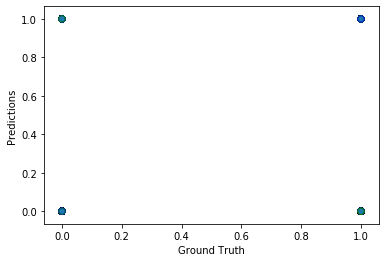

In [184]:
plt.scatter(yTest, predictionsRF_Tuned_Original, edgecolor=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## Las clasificaciones fueron creadas dentro de los rangos aceptables: 0 y 1